# PyTorch Fundamentals
<hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
torch.__version__

'2.1.1+cu118'

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


## PyTorch Tensors
<hr>
Tensors are the fundamental data types of PyTorch. A tensor is a multi-dimensional matrix similar to Numpy's ndarrays:

- A scalar can be represented as a zero-dimensional tensor.
- A vector can be represented as a one-dimensional tensor.
- ...

<div style="text-align:center">
    <img src="media/tensor_intro.png" width=500>
    <center><br><caption>Tensors of different shapes</caption></center>
</div>

In [3]:
x = torch.tensor([[1, 2]])    # 2D matrix of size: (1, 2)
y = torch.tensor([[1], [2]])  # 2D matrix of size: (2, 1)
z = torch.tensor([1, 2])      # 1D vector of size: (2,  )

In [4]:
print(x.shape)
print(y.shape)
print(z.shape)

torch.Size([1, 2])
torch.Size([2, 1])
torch.Size([2])


In [5]:
zeros = torch.zeros((3, 4))   # 2D tensor of zeros of size: (3, 4)
ones = torch.ones((2, 2))     # 2D tensor of ones of size: (2, 2)

In [8]:
x = torch.randint(low=0, high=10, size=(3, 4))  # 2D tensor of size (3, 4) containing integers [0, 10)
print(x)

tensor([[9, 0, 3, 5],
        [0, 2, 1, 1],
        [0, 0, 9, 7]])


In [9]:
y = torch.randn((3, 4))       # 2D tensor of size (3, 4) taken from the standard normal distribution
print(y)

tensor([[-1.0641, -0.1056, -0.2982, -0.5418],
        [ 0.2103,  1.4237, -1.0822, -1.2910],
        [-1.3456, -0.2784,  0.0295, -0.0188]])


In [16]:
x = np.array([
    [1, 2, 3],
    [4, 5, 6],
])

y = torch.tensor(x)

print(type(x), type(y))
print(y)

<class 'numpy.ndarray'> <class 'torch.Tensor'>
tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)


## Operations on Tensors
<hr>

In [28]:
x = torch.tensor([
    [1, 2, 3],
    [4, 5, 6]
])

In [30]:
print(x * 10)        # multiples tensor by 10

tensor([[10, 20, 30],
        [40, 50, 60]])


In [31]:
print(x.add(10))     # adds 10 to the tensor elements

tensor([[11, 12, 13],
        [14, 15, 16]])


In [32]:
print(x.shape)       # original shape of the tensor

torch.Size([2, 3])


In [33]:
print(x.view(3, 2))  # reshape tensor to (3, 2)

tensor([[1, 2],
        [3, 4],
        [5, 6]])


In [ ]:
print(x.view(4, -1))  # invalid because (3, 2) can't fit to (4, ?)

In [36]:
# another way to reshape a tensor is by using the `squeeze` method
x = torch.randn(10, 1, 10)     # 3D tensor of size (10, 1, 10)

# remove the dimension 1
y = torch.squeeze(x, 1)        # 2D tensor of size (10, 10)

# or similarly
z = x.squeeze(1)               # 2D tensor of size (10, 10)

In [40]:
print(x.shape, y.shape, z.shape)
print(torch.all(y == z))

torch.Size([10, 1, 10]) torch.Size([10, 10]) torch.Size([10, 10])
tensor(True)


In [42]:
# the opposite of `squeeze` is `unsqueeze` to add a dimension
reverse_z = z.unsqueeze(1)    # add a new dimension at index 1
print(reverse_z.shape)        # original z.shape=(10, 10); after adding dim, z.shape(10, 1, 10)

torch.Size([10, 1, 10])


In [43]:
# unsqueezing can also be done using [None] indexing
# adding None will auto-create a fake dimension at the specified axis

x = torch.randn(10, 10)
z1, z2, z3 = x[None], x[:,None], x[:,:,None]

print(x.shape)
print(z1.shape, z2.shape, z3.shape)

torch.Size([10, 10])
torch.Size([1, 10, 10]) torch.Size([10, 1, 10]) torch.Size([10, 10, 1])


In [44]:
# MATRIX MULTIPLICATION
# ------------------- #
x = torch.tensor([
    [1, 2],
    [3, 4]
])

y = torch.tensor([
    [5],
    [6]
])

# x.shape(2, 2) and y.shape(2, 1)
# z.shape(2, 1)

z = torch.matmul(x, y)
print(z)

tensor([[17],
        [39]])


In [45]:
# alternatively, multiplication can be performed as
print(x @ y)

tensor([[17],
        [39]])


In [47]:
# CONCATENATION
# ----------- #
x = torch.randn(10, 10, 10)
y = torch.cat([x, x], axis=0)

print('Cat axis 0:', x.shape, y.shape)

Cat axis 0: torch.Size([10, 10, 10]) torch.Size([20, 10, 10])


In [53]:
# AGGREGATE FUNCTIONS
# ----------------- #
x = torch.arange(25).reshape(5, 5)

print(x)
print('Max:', x.max())
print('\nThe maximum row (dim=0) is the following: (entries and the row number) \n', x.max(dim=0))
print('\nThe maximum col (dim=1) is the following: (entries and the col number) \n', x.max(dim=1))

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]])
Max: tensor(24)

Max number and its row:
 torch.return_types.max(
values=tensor([20, 21, 22, 23, 24]),
indices=tensor([4, 4, 4, 4, 4]))

Max number and its col:
 torch.return_types.max(
values=tensor([ 4,  9, 14, 19, 24]),
indices=tensor([4, 4, 4, 4, 4]))


In [55]:
# Permute the dimensions of a tensor object
# if you need to swap dimensions, use permute and not view; although torch will not throw an error

x = torch.randn(10, 20, 30)
z = x.permute(2, 0, 1)
print('Permute dimensions:', x.shape, z.shape)

Permute dimensions: torch.Size([10, 20, 30]) torch.Size([30, 10, 20])


## Autogradients
<hr>

In [60]:
x = torch.tensor([
    [2., -1.],
    [1., 1.],
], requires_grad=True)

# let's define result as the sum of squares of the entries in x
poly_x = x.pow(2).sum()

# the gradient of poly_x is 2*x
poly_x.backward()

x.grad

tensor([[ 4., -2.],
        [ 2.,  2.]])

## Numpy vs Torch
<hr>

In [4]:
x = torch.rand(1, 6400)
y = torch.rand(6400, 5000)

In [5]:
x, y = x.to(device), y.to(device)

In [6]:
%timeit z = (x@y)

504 µs ± 1.11 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [8]:
x, y = x.cpu(), y.cpu()

%timeit z = (x@y)

4.57 ms ± 108 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
%timeit z = np.matmul(x, y)

5.73 ms ± 25.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Building NN on a Toy Dataset
<hr>

In [10]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

print(type(x), type(y))

<class 'list'> <class 'list'>


In [11]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

print(type(X), type(Y))

<class 'torch.Tensor'> <class 'torch.Tensor'>


In [12]:
X = X.to(device)
Y = Y.to(device)

In [13]:
import torch.nn as nn

In [15]:
class toy_network(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2, 8)    # x.shape = (4, 2) -> hidden = (2, 8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8, 1)   # hidden = (2, 8) -> output = (8, 1)
        
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

In [16]:
net = toy_network().to(device)

In [17]:
y_hat = net(X)

In [18]:
loss_func = nn.MSELoss()

loss_value = loss_func(y_hat, Y)
print(loss_value)

tensor(101.5325, device='cuda:0', grad_fn=<MseLossBackward0>)


In [19]:
from torch.optim import SGD

opt = SGD(net.parameters(), lr=0.001)

D:\github\data-mining\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
loss_history = []

for _ in range(50):
    opt.zero_grad()
    loss_value = loss_func(net(X), Y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value.item())

Text(0, 0.5, 'loss value')

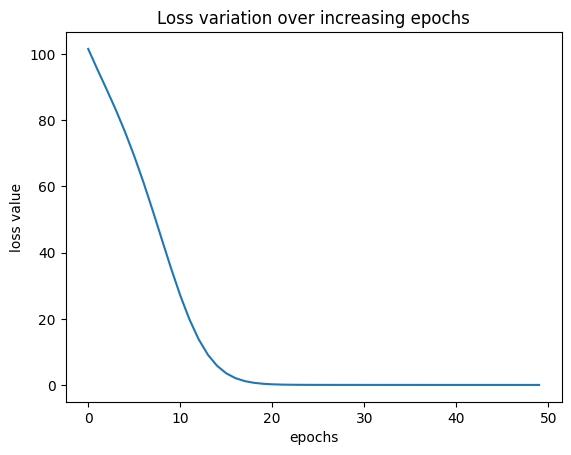

In [21]:
%matplotlib inline

plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')

## Dataset, DataLoader, and batch size
<hr>

In [27]:
import time
from torch.utils.data import Dataset, DataLoader

In [28]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

X = torch.tensor(x).float().to(device)
Y = torch.tensor(y).float().to(device)

In [29]:
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x).float()
        self.y = torch.tensor(y).float()
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [30]:
ds = MyDataset(X, Y)
dl = DataLoader(ds, batch_size=2, shuffle=True)

C:\Users\izhar\AppData\Local\Temp\ipykernel_17004\457851731.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.x = torch.tensor(x).float()
C:\Users\izhar\AppData\Local\Temp\ipykernel_17004\457851731.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y = torch.tensor(y).float()


In [31]:
for x, y in dl:
    print(x,y)

tensor([[3., 4.],
        [5., 6.]], device='cuda:0') tensor([[ 7.],
        [11.]], device='cuda:0')
tensor([[1., 2.],
        [7., 8.]], device='cuda:0') tensor([[ 3.],
        [15.]], device='cuda:0')


In [32]:
# using previously defined nn architecture

loss_history = []
start = time.time()
for _ in range(50):
    for data in dl:
        x, y = data
        opt.zero_grad()
        loss_value = loss_func(net(x), y)
        loss_value.backward()
        opt.step()
        loss_history.append(loss_value)
end = time.time()
print(end - start)

0.0948495864868164


In [33]:
# predicting on new data points
val_x = [[10, 11]]
val_x = torch.tensor(val_x).float().to(device)

net(val_x)

tensor([[20.4640]], device='cuda:0', grad_fn=<AddmmBackward0>)

## Fetching the values of intermediate steps
<hr>

In [47]:
X

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]], device='cuda:0')

In [48]:
# One way is by directly calling layers as if they are functions:
net.input_to_hidden_layer(X) 

tensor([[-0.4014,  0.0352, -0.4913,  1.5969, -0.3809, -0.7165, -0.1594,  1.0123],
        [-0.5684, -0.1698, -1.5498,  3.4724, -0.5276, -0.7394,  0.5798,  2.9378],
        [-0.7355, -0.3748, -2.6083,  5.3479, -0.6742, -0.7622,  1.3190,  4.8634],
        [-0.9025, -0.5798, -3.6667,  7.2235, -0.8208, -0.7851,  2.0582,  6.7890]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [49]:
# another way is to return the value in the nn.Module definition

torch.random.manual_seed(10)

class toy_network(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
        
    def forward(self, x):
        hidden1 = self.input_to_hidden_layer(x)
        hidden2 = self.hidden_layer_activation(hidden1)
        x = self.hidden_to_output_layer(hidden2)
        return x, hidden1, hidden2

In [50]:
net = toy_network().to(device)

In [51]:
net(X)[1]

tensor([[-0.4014,  0.0352, -0.4913,  1.5969, -0.3809, -0.7165, -0.1594,  1.0123],
        [-0.5684, -0.1698, -1.5498,  3.4724, -0.5276, -0.7394,  0.5798,  2.9378],
        [-0.7355, -0.3748, -2.6083,  5.3479, -0.6742, -0.7622,  1.3190,  4.8634],
        [-0.9025, -0.5798, -3.6667,  7.2235, -0.8208, -0.7851,  2.0582,  6.7890]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

## Using the Sequential method to build a NN
<hr>

In [54]:
model = nn.Sequential(
    nn.Linear(2, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
).to(device)

In [56]:
from torchsummary import summary

In [57]:
summary(model, torch.zeros(1, 2))

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 8]                   24
├─ReLU: 1-2                              [-1, 8]                   --
├─Linear: 1-3                            [-1, 1]                   9
Total params: 33
Trainable params: 33
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 8]                   24
├─ReLU: 1-2                              [-1, 8]                   --
├─Linear: 1-3                            [-1, 1]                   9
Total params: 33
Trainable params: 33
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

## Saving and Loading a PyTorch model
<hr>

In [58]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2396,  0.3115],
                      [-0.3910,  0.6366],
                      [-0.0488,  0.6101],
                      [ 0.2168,  0.5535],
                      [ 0.5641, -0.1477],
                      [-0.2057,  0.1064],
                      [-0.0301,  0.1106],
                      [ 0.3587, -0.5525]], device='cuda:0')),
             ('0.bias',
              tensor([-0.0324, -0.5550,  0.6829, -0.4973,  0.1352, -0.1932,  0.4019,  0.0024],
                     device='cuda:0')),
             ('2.weight',
              tensor([[-0.0356,  0.2588,  0.3229, -0.2566, -0.3410,  0.0295,  0.1114,  0.0807]],
                     device='cuda:0')),
             ('2.bias', tensor([0.3266], device='cuda:0'))])

Running `torch.save(model.state_dict(), 'mymodel.pth')` will save this model in a Python serialized format on the disk with the name `mymodel.pth`. A good practice is to transfer the model to the CPU before calling `torch.save` as this will save tensors as CPU tensors and not as CUDA tensors. This will help in loading the model onto any machine, whether it contains CUDA capabilities or not. We save the model using the following code:

```python
torch.save(model.to('cpu').state_dict(), 'mymodel.pth')
```

Loading a model would require us to initialize the model with random weights first and then load the weights from state_dict:

```python
# Create an empty model
model = nn.Sequential(
    nn.Linear(2, 8),
    nn.ReLU(),
    nn.Liner(8, 1)
    ).to(device)

# Load the model from disk and unserialize it
state_dict = torch.load('mymodel.pth')

# Load `state_dict` onto `model`, register to `device`
model.load_state_dict(state_dict)
model.to(device)
model(torch.tensor(val).float().to(device))
```

## Image Classification Task
<hr>

In [59]:
from torchvision import datasets

data_folder = './datasets/FMNIST'
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)

100%|██████████| 26421880/26421880 [00:12<00:00, 2066181.46it/s]


Extracting ./datasets/FMNIST\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./datasets/FMNIST\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 312295.52it/s]


Extracting ./datasets/FMNIST\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./datasets/FMNIST\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2525752.35it/s]


Extracting ./datasets/FMNIST\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./datasets/FMNIST\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<?, ?it/s]

Extracting ./datasets/FMNIST\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./datasets/FMNIST\FashionMNIST\raw



In [60]:
tr_images = fmnist.data
tr_targets = fmnist.targets

In [61]:
unique_values = tr_targets.unique()

In [62]:
print(f"tr_images & tr_targets:\n\tX - {tr_images.shape}\n\tY - {tr_targets.shape}\n\tY - Unique Values: {unique_values}")
print(f"TASK:\n\t{len(unique_values)} class classification")
print(f"UNIQUE CLASSES:\n\t{fmnist.classes}")

tr_images & tr_targets:
	X - torch.Size([60000, 28, 28])
	Y - torch.Size([60000])
	Y - Unique Values: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
TASK:
	10 class classification
UNIQUE CLASSES:
	['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


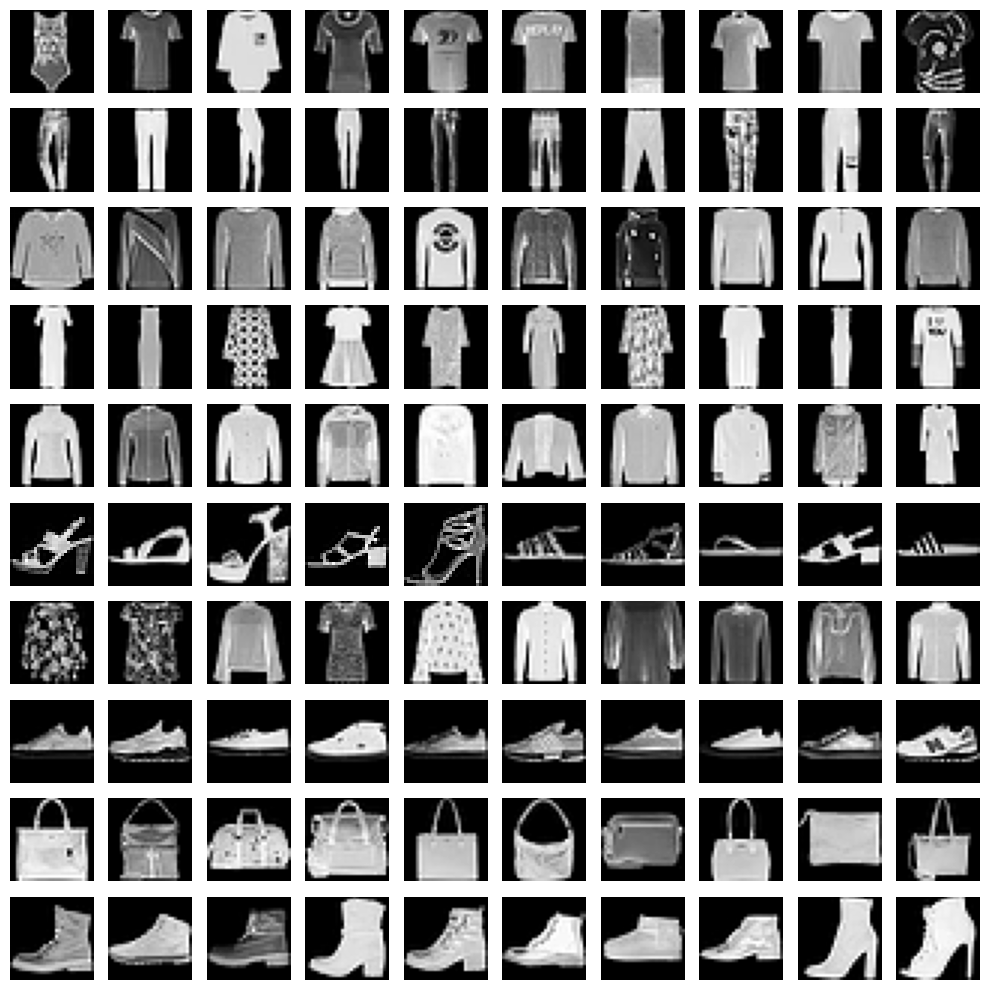

In [63]:
# random sample of 10 images
R, C = len(tr_targets.unique()), 10
fig, ax = plt.subplots(R, C, figsize=(10,10))
for label_class, plot_row in enumerate(ax):
    label_x_rows = np.where(tr_targets == label_class)[0]
    for plot_cell in plot_row:
        plot_cell.grid(False); plot_cell.axis('off')
        ix = np.random.choice(label_x_rows)
        x, y = tr_images[ix], tr_targets[ix]
        plot_cell.imshow(x, cmap='gray')
plt.tight_layout()

## Training a Neural Network
<hr>

In [84]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        # scale image
        x = x.float() / 255
        # reshape image
        x = x.view(-1,28*28)
        self.x, self.y = x, y
        
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix] 
        return x.to(device), y.to(device)
    
    def __len__(self): 
        return len(self.x)

In [85]:
def get_data(): 
    train = FMNISTDataset(tr_images, tr_targets) 
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    return trn_dl

In [86]:
def get_model():
    # one hidden layer containing 1000 neurons
    model = nn.Sequential(
        nn.Dropout(0.25),
        nn.Linear(28 * 28, 1000),
        nn.ReLU(),
        nn.Dropout(0.25),
        nn.Linear(1000, 10)
    ).to(device)
    
    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-3)
    
    return model, loss_fn, optimizer

In [87]:
def train_batch(x, y, model, opt, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

In [88]:
@torch.no_grad()
def accuracy(x, y, model):
    model.eval()
    prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

In [90]:
from torch.optim import Adam

In [91]:
trn_dl = get_data()
model, loss_fn, optimizer = get_model()

In [92]:
losses, accuracies = [], []

for epoch in range(5):
    print(epoch)
    epoch_losses, epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        epoch_losses.append(batch_loss)
    epoch_loss = np.array(epoch_losses).mean()
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        epoch_accuracies.extend(is_correct)
    epoch_accuracy = np.mean(epoch_accuracies)
    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)

0
1
2
3
4


C:\Users\izhar\AppData\Local\Temp\ipykernel_17004\1668084199.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


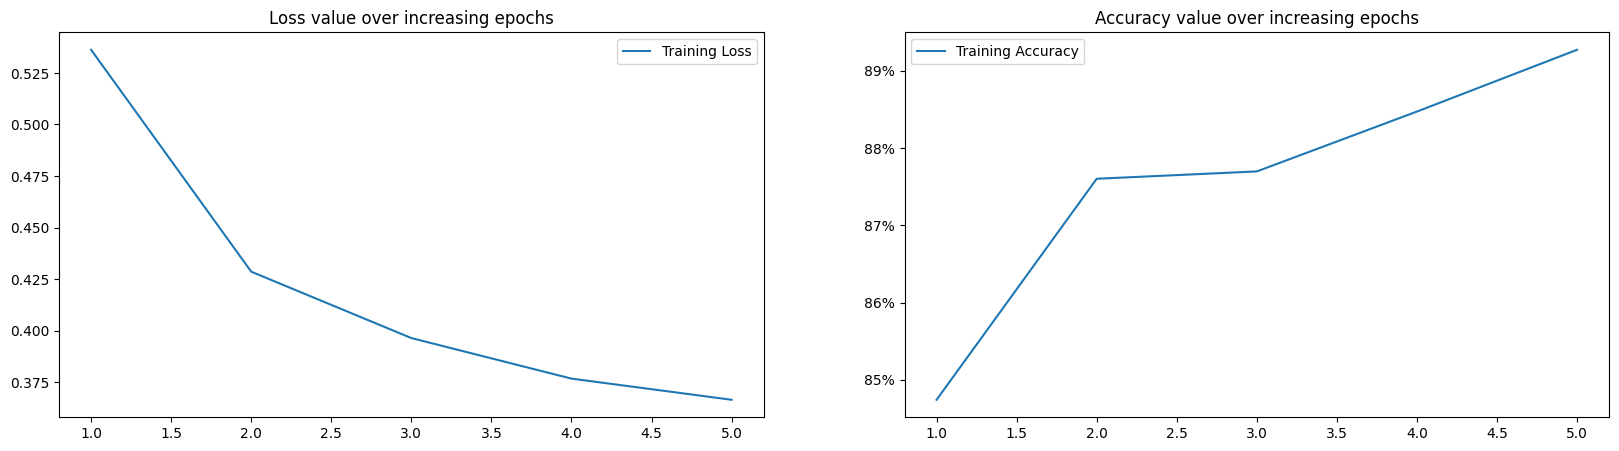

In [93]:
epochs = np.arange(5)+1
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Loss value over increasing epochs')
plt.plot(epochs, losses, label='Training Loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy value over increasing epochs')
plt.plot(epochs, accuracies, label='Training Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()

In [94]:
max(accuracies)

0.8927333333333334